In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv('NAS.csv')
df['Date'] = pd.to_datetime(df['Date'])

In [3]:
df = df.dropna()
df.loc[df['Date'] == '2018-06-20']

,Date,Open,High,Low,Close,Adj Close,Volume
3668,2018-06-20,163.901001,164.533997,157.804993,157.804993,157.804993,813015.0


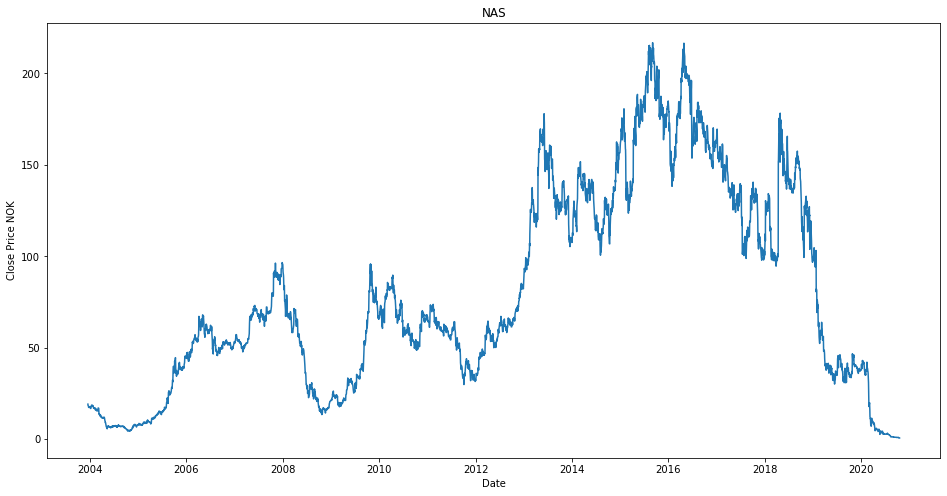

In [4]:
plt.figure(figsize=(16,8))
plt.title('NAS')
plt.xlabel('Date')
plt.ylabel('Close Price NOK')
plt.plot(df['Date'],df['Close'])
#plt.plot(df['Close'])
plt.show()

In [5]:
#Removing all columns and focusing on the close price
#Here we are using copy because we are making a full new copy
df = df[['Date','Close']].copy()

#Here is the desired date to predict the price 
inputdato = '2018-06-20'
#Creating a dataframe with all the dates up to the desired date
inputdf = df[['Date','Close']].copy()
inputdf = inputdf.loc[df['Date'] <= inputdato]

In [6]:
#Here we are creating a variable for the amount of days into the future
#The purpose of this is to train the algorithm 
future_days = 25
#Here we are creating a new column for the target predictions shifted 'x' days up 
df['Prediction'] = df[['Close']].shift(-future_days)

In [7]:
#Here we are creating the feature data set (X) and converting it into a numpy array where we ignore the last 'x' days
X = np.array(df.drop(['Prediction','Date'], 1)) [:-future_days] #This method makes the closing values in a column
print(X)

[[19.139799]
 [18.454201]
 [18.0543  ]
 ...
 [ 1.054   ]
 [ 1.042   ]
 [ 1.0425  ]]


In [8]:
#Here we are creating the target data set (y) and converting it into a numpy array where we ignore the last 'x' days
y = np.array(df['Prediction'])[:-future_days]
print(y)

[17.1401 17.0259 16.7973 ...  0.626   0.605   0.6106]


In [9]:
#Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [10]:
#Create the models
#Create the decision tree regressor model
tree = DecisionTreeRegressor(random_state=0).fit(x_train, y_train)

In [11]:
#Here the input for the prediction model is set up
#First we set it to be all the dates in the inputdataframe up to the 25 last days in the dataframe
#This way the model goes through 25 days until it reaches the date the user requested which is the last date in dataframe
predictionInput = inputdf.loc[df['Date'] <= inputdato][:-25]
predictionInput = predictionInput.drop(['Date'], 1)
#Setting up the 25 last in the current predictioninput
predictionInput = predictionInput.tail(25)
predictionInput = np.array(predictionInput)
#test

In [12]:
#Get the last 'x' rows/days from the feature data set
#x_future = df.drop(['Prediction','Date'], 1)[:-future_days]
#x_future = x_future.tail(future_days)
#x_future = np.array(x_future)
#x_future

In [13]:
#Creating variable for the future set
#x_future = df.drop(['Prediction','Date'], 1)
#x_future = x_future.tail(25+future_days)
#x_future = np.array(x_future)
#x_future

In [14]:
tree_prediction = tree.predict(predictionInput)
print(tree_prediction)

[156.654999 172.470001 144.059998 157.287994 125.523003 153.376999
 157.688995 142.277504 145.153    145.210999 146.475998 145.153
 113.523003 141.011993 141.472    140.897003 186.541504 141.070007
 142.220001 136.757004 152.832993 169.287003 157.574997 165.626007
 157.804993]


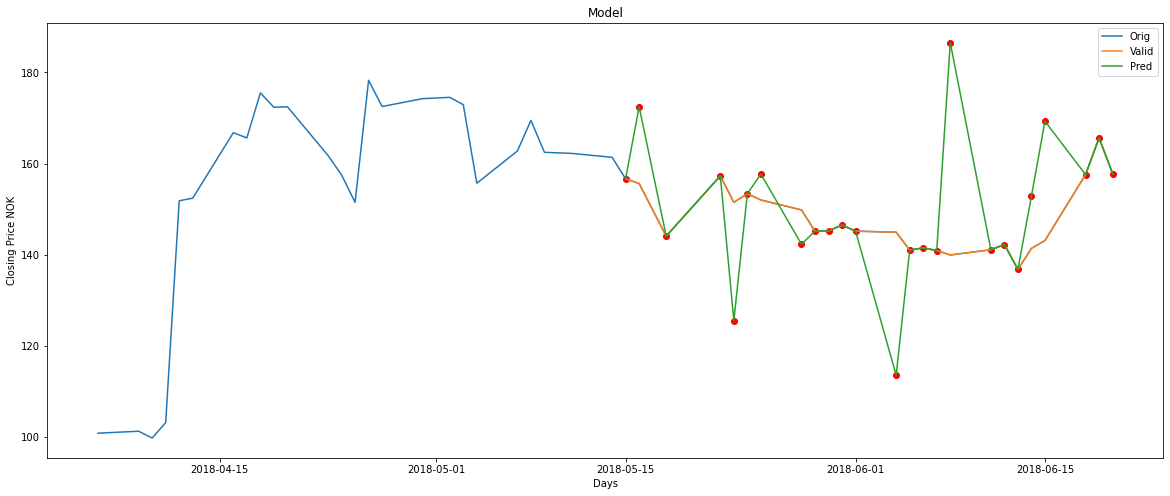

In [15]:
predictions = tree_prediction
valid = inputdf.tail(25).copy()
valid['Actual Predictions'] = predictions
valid
plt.figure(figsize=(20,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Closing Price NOK')
plt.scatter(valid['Date'],valid['Actual Predictions'], color = 'red')
plt.plot(inputdf['Date'][-50:],inputdf['Close'][-50:])
plt.plot(valid['Date'],valid[['Close','Actual Predictions']])
plt.legend(['Orig','Valid','Pred'])
#plt.xlim([datetime.date(2018,1,1), datetime.date(2020,1,1)])
plt.show()

In [25]:
print("Prisen på den ønskede datoen : "+inputdato+" = "+valid['Actual Predictions'].iloc[-1].astype(str))

Prisen på den ønskede datoen : 2018-06-20 = 157.804993


In [17]:
#Here we are going to visualize the prediction
#predictions = tree_prediction

#Here we are appending 25 days into the future in the dataset
#df = df.append(pd.DataFrame({'Date': pd.date_range(start=df.Date.iloc[-1], periods=26,freq='D',closed='right')}))
#df = df.reset_index(drop=True)

#valid = df[X.shape[0]:].copy()
#valid['Predictions'] = predictions
#plt.figure(figsize=(20,8))
#plt.title('Model')
#plt.xlabel('Days')
#plt.ylabel('Closing Price NOK')
#plt.scatter(valid['Date'],valid['Predictions'], color = 'red')
#plt.plot(inputdf['Date'],inputdf['Close'])
#plt.plot(valid['Date'],valid[['Close','Predictions']])
#plt.legend(['Orig','Valid','Pred'])
#plt.show()

#As you can see the yellow line shows the actual price and the green shows the prediction
#From this we can see that the prediction is accurate when price is calm
#But at some points where the price goes up or down the algorithm isn't perfect
#The reason why the model isn't very accurate is because the price over the whole time it has existed has fluctuated alot
#especially in the last year because of the coronavirus

In [18]:
#tree_prediction = tree.predict(x_future)
#print(tree_prediction)

In [19]:
#df['Prediction'].tail(25) = valid['Predictions']

#nydf = nydf.append(pd.DataFrame({'Date': pd.date_range(start=df.Date.iloc[-1], periods=26,freq='D',closed='right')}))
#nydf = nydf.reset_index(drop=True)

#Here we are creating a variable for the amount of days into the future
#future_days = 25
#Here we are creating a new column for the target predictions shifted 'x' days up 
#nydf['Prediction'] = nydf[['Close']].shift(-future_days)
#df.tail(50)

#x1_future = nydf.drop(['Prediction','Date'], 1)
#x1_future = x_future.tail(25+future_days)
#x1_future = np.array(x_future)
#x1_future

In [20]:
#Testing input date
#inputdato = '2004-01-02'
#df.loc[df['Date'] == inputdato]
#inputdf = df.loc[df['Date'] == inputdato]
#inputdf= inputdf.drop(['Prediction', 'Date'], 1)
#inputdf = np.array(inputdf)
#inputdf

In [21]:
#inputprediction = tree.predict(inputdf)
#inputprediction

In [22]:
#df.loc[df['Date'] == '2017-05-10']

In [23]:
#inputdf = df.loc[df['Date'] == '2017-05-10']
#inputdf= inputdf.drop(['Prediction', 'Date'], 1)
#inputdf = np.array(inputdf)
#inputdf

In [24]:
#inputprediction = tree.predict(inputdf)
#inputprediction